# Topological Polygons and Plate Areas

### Overview
This notebook covers:
- how to generate resolved plate topologies in pygplates
- how to access information about the geometry of each plate (in particular the area)
- sorting arrays changing their order


In [3]:
import pygplates

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

%matplotlib inline


#### Topological Plate Polygon exercise

This exercise deals with plate topological polygons. The tutorial 'pygplates-topologies' is a useful starting place before attempting the exercise below.


In [4]:
rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'
input_topology_filename = 'Data/Seton_etal_ESR2012_PP_2012.1.gpmlz'

topology_features = pygplates.FeatureCollection(input_topology_filename)
rotation_model = pygplates.RotationModel(rotation_filename)

# Specify time at which to create resolved topological plate polygons
time=0.
resolved_topologies = []
pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time)
pygplates.resolve_topologies(topology_features, rotation_model, 'plate_polygons.shp', time)



### Exercise 1 - plate size distributions

In this exercise, we'll ask some simple questions about the size of plates.
- are all plates the same size, or do plate sizes vary?
- what does the distribution of plate sizes say about the processes that control their size?
- does the distribution of plate sizes change through time, and why?

Some useful context for this analysis can be found in these paper:


#### Step one: Plate sizes for present day

Begin by attempting to get a list of all the plate areas for the present day plate polygons. Sort these into descending order, then plot them on a loglog scale following the same format as shown in the literature cited above. 

Some useful python strategy here:
- turn a 'list' array into a 'numpy' array, makes it easier to sort a series of numbers in ascending order
- to reverse the order of an array, try using the indexing operation like this (and try to understand why this works): 
> reversed_Array = Array[::-1]


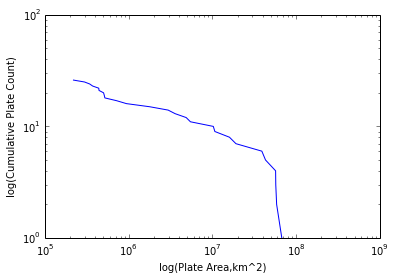

In [5]:
# SOLUTION
plate_areas = []

for topology in resolved_topologies:
    # Get the plate_id and name
    plate_feature = topology.get_resolved_feature()
    # Get the plate area - note we use the built in pygplates Earth radius to get 
    plate_geometry = topology.get_resolved_geometry()
    plate_areas.append(plate_geometry.get_area()*pygplates.Earth.mean_radius_in_kms**2)

plate_areas = np.array(plate_areas)

plt.loglog(np.sort(plate_areas)[::-1],range(len(plate_areas)))
plt.xlabel('log(Plate Area,km^2)')
plt.ylabel('log(Cumulative Plate Count)')
plt.show()


Once you think you have succeeded, try looking at this webpage to see if the results make sense:

http://peterbird.name/publications/2003_PB2002/2003_PB2002.htm

### Exercise: plate size distribution through time

Try writing a loop that plots the same distribution for other reconstruction times. Try different ways of plotting the results (e.g. as separate plots for each time, or a single plot where the different 


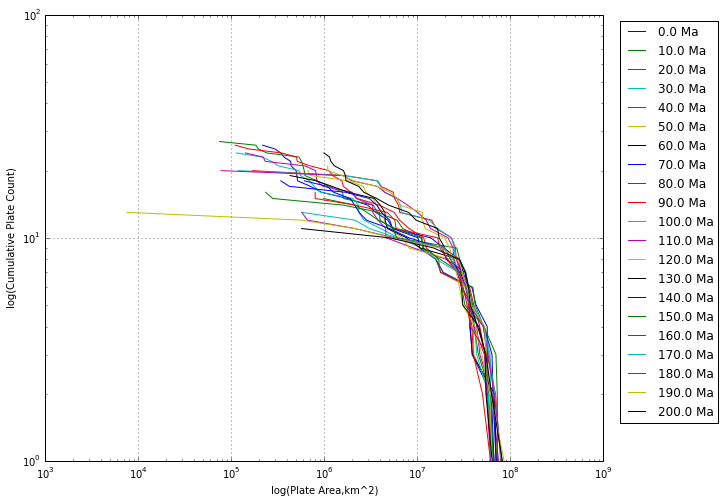

In [6]:
# SOLUTION

plt.figure(figsize=(10,8))
for time in range(0,201,10):
    
    resolved_topologies = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time)

    plate_areas = []

    for topology in resolved_topologies:
        # Get the plate_id and name
        plate_feature = topology.get_resolved_feature()
        # Get the plate area - note we use the built in pygplates Earth radius to get 
        plate_geometry = topology.get_resolved_geometry()
        plate_areas.append(plate_geometry.get_area()*pygplates.Earth.mean_radius_in_kms**2)

    plate_areas = np.array(plate_areas)

    plt.loglog(np.sort(plate_areas)[::-1],range(len(plate_areas)),label='%0.1f Ma' % time)

plt.xlabel('log(Plate Area,km^2)')
plt.ylabel('log(Cumulative Plate Count)')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=1)
plt.show()
